# 01 - Speed vs Distance

This started as a purely exploratory notebook but I ended up focusing on distance vs average speed of my runs.

In [1]:
import pandas as pd

I exported my MapMyFitness data via using these instructions: https://support.mapmyfitness.com/hc/en-us/articles/200118594-Export-Workout-Data.

Load in the CSV.

In [2]:
data = pd.read_csv('data/user82388963_workout_history.csv')
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"Jan. 25, 2020","Jan. 25, 2020",Run,509,4.45226,2117,7.92006,1.59279,7.57570,37.66970,149.0,5553.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3998570485
1,"Jan. 23, 2020","Jan. 23, 2020",Indoor Run / Jog,523,4.00000,1717,7.15417,6.40770,8.38672,9.36374,161.0,4658.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3995188852
2,"Jan. 22, 2020","Jan. 23, 2020",Weight Workout,262,0.00000,2220,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,http://www.mapmyfitness.com/workout/3994340308
3,"Jan. 21, 2020","Jan. 21, 2020",Indoor Run / Jog,400,3.00000,1345,7.47222,6.83695,8.02974,8.77584,167.0,3582.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3991922437
4,"Jan. 20, 2020","Jan. 20, 2020",Indoor Run / Jog,532,4.00000,1788,7.45000,6.80370,8.05369,8.81873,151.0,4731.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3990189352


What are the activity types?
I'm only interested in my running workouts.

In [3]:
data['Activity Type'].value_counts()

Run                 157
Indoor Run / Jog    118
Machine Workout       5
Weight Workout        4
Name: Activity Type, dtype: int64

In [4]:
run_activity_types = ['Run', 'Indoor Run / Jog']
data = data[data['Activity Type'].isin(run_activity_typesity_types)]

Save that data in its own file.

In [44]:
data.to_csv('data/runs.csv', index=False)

Plot the mileage / speed interplay.

In [7]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"Jan. 25, 2020","Jan. 25, 2020",Run,509,4.45226,2117,7.92006,1.59279,7.57570,37.66970,149.0,5553.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3998570485
1,"Jan. 23, 2020","Jan. 23, 2020",Indoor Run / Jog,523,4.00000,1717,7.15417,6.40770,8.38672,9.36374,161.0,4658.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3995188852
3,"Jan. 21, 2020","Jan. 21, 2020",Indoor Run / Jog,400,3.00000,1345,7.47222,6.83695,8.02974,8.77584,167.0,3582.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3991922437
4,"Jan. 20, 2020","Jan. 20, 2020",Indoor Run / Jog,532,4.00000,1788,7.45000,6.80370,8.05369,8.81873,151.0,4731.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3990189352
6,"Jan. 17, 2020","Jan. 17, 2020",Indoor Run / Jog,529,4.00000,1765,7.35417,6.72304,8.15864,8.92454,150.0,4777.0,NaN,Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3985745017


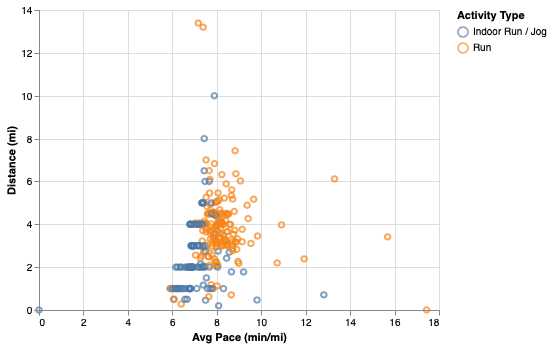

In [10]:
import altair as alt
alt.Chart(data).mark_point().encode(
    x='Avg Pace (min/mi)',
    y='Distance (mi)',
    color='Activity Type:N'
)

Some cool stuff already -- my outdoor runs are pretty randomly distributed in terms of distance (y axis) but my indoor runs are mostly clustered around a few round distances.
This makes a lot of sense: on a treadmill, I am for a nice round number of miles.

One issue I see here is that there are quite a few runs of less than a mile and they have a huge variance in terms of pace: from 0 (?) to almost 18 minutes per mile.
I am not very interested in my runs of less than a mile, so will remove those records.

In [13]:
print('Record count of all runs:', len(data))
data = data[data['Distance (mi)'] >= 1]
print('Record count of runs of at least one mile:', len(data))

Record count of all runs: 275
Record count of runs of at least one mile: 262


Plot again but with the filtered data.

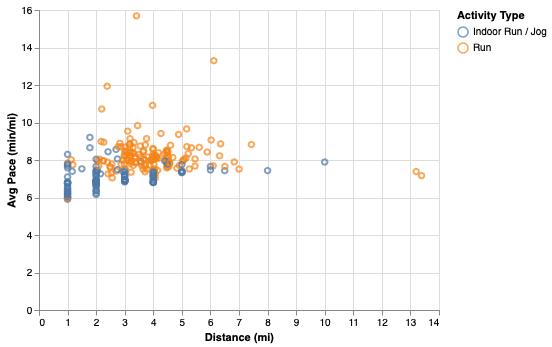

In [55]:
import altair as alt
run_chart = alt.Chart(data).mark_point().encode(
    x='Distance (mi)',
    y='Avg Pace (min/mi)',
    color='Activity Type:N'
).interactive()
run_chart

Is there a trend here?
One would expect my speed to decrease at higher mileage.
But in this case we're measuring speed in min/mi, which means that lower numbers are actually faster (a 6 minute mile is faster than an 8 minute mile).
So these two variables should be positively correlated -- as distance increases, the number of minutes per mile should also increase.

We can run a quick regression.

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = data[['Distance (mi)']]
y = data['Avg Pace (min/mi)']
lr.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lr.coef_, lr.intercept_

(array([0.1572358]), 7.232613418853299)

So this model is a line `y=0.16*x + 7.23`
That means that for each additional mile, my average pace increases by about .16 minutes.

In [58]:
.16 * 60

9.6

... which is 10 seconds.

Let's see what predictions that makes for common distances.

In [59]:
import numpy as np
distances = np.array([1, 2, 3, 4, 6, 8, 13.1, 26.2])
# Reshape to be a column.
X_pred = X_pred.reshape((len(distances), 1))
y_pred = lr.predict(X_pred)
pd.DataFrame({'Distance (mi)': distances, 'Avg Pace (min/mi)': y_pred})

,Distance (mi),Avg Pace (min/mi)
0,1.0,7.389849
1,2.0,7.547085
2,3.0,7.704321
3,4.0,7.861557
4,6.0,8.176028
5,8.0,8.490500
6,13.1,9.292402
7,26.2,11.352191


These predictions are pretty good for the 3-4 mile range, but my long run times have been a lot less than 9 min/mi.

In [60]:
data.loc[data['Distance (mi)'] >= 10, ['Distance (mi)', 'Avg Pace (min/mi)']]

,Distance (mi),Avg Pace (min/mi)
176,13.1995,7.38536
237,13.3893,7.16739
254,10.0000,7.89167


Maybe this model is just not very well-suited to the problem -- the data may be nonlinear.

We can check the R-squared.

In [61]:
lr.score(X, y)

0.06591089349010537

That .... is terrible?

We can overlay a line on our data to see how bad the fit really is visually.

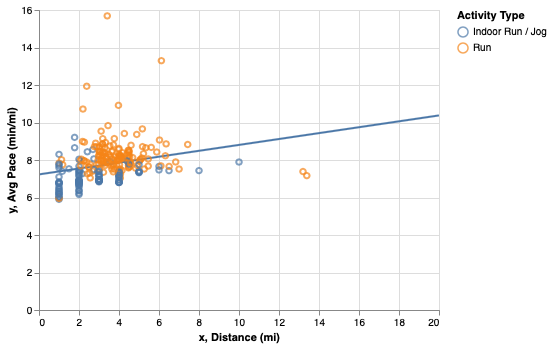

In [62]:
# To draw a line, we need two coordinates to connect.
x_line = np.array([0, 20]).reshape((2, 1))
y_line = lr.predict(x_line)
line_df = pd.DataFrame({'x': x_line.flatten(), 'y': y_line})

line_chart = alt.Chart(line_df).mark_line().encode(
    x='x',
    y='y'
)
line_chart + run_chart

It looks okay, but probably not all that much better than just predicting every run will be the average pace (so a flat, horizontal line).

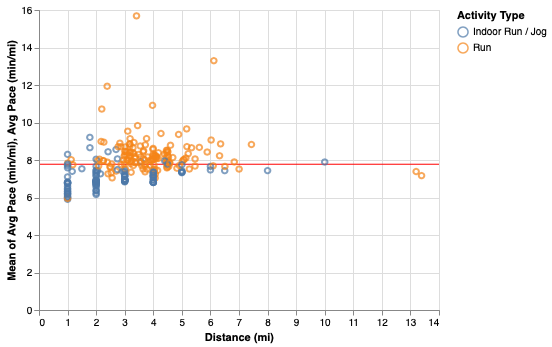

In [68]:
rule = alt.Chart(data).mark_rule(color='red').encode(
    y='mean(Avg Pace (min/mi)):Q'
)
rule + run_chart

What have we learned?
Distance and speed are surprisingly unrelated for me.